In [2]:
import pytest

#  Water Pouring Problem

In this problem, you have a faucet with two cylinders of different sizes. The cylinders are unmarked (you can't determine partial measurements). The goal is to establish a sequence of pours to fill one of the cylinders with a certain amount of water. For example, if one cylinder is 9oz and the second 4oz with the goal of filling the first cylinder with 5oz of water. The sequence of pours would be: pour 9oz in the first cylinder; fill the second cylinder all the way (4oz), leaving 5oz of water.

The allowed pouring actions are:
* One glass to another
* From faucet to either glass
* From glass to the drain

This amounts to six possible actions.

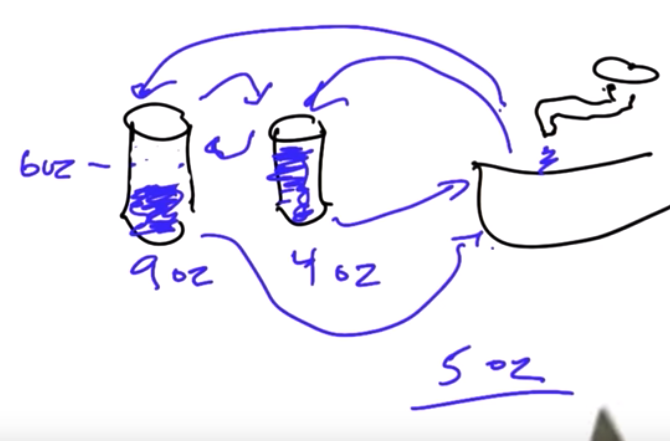

As usual, we next gather our concept inventory:
* Glasses: capacity and current level
* Collection of glasses: the pair of glasses and their current levels amount to the state of the world (everthing we need to know about where we are in the problem).
* Goal
* Pouring actions: 6 possible actions with three varieties--emptying, filling, transferring
* Solution: sequence of steps to reach our goal

Transferring is tricky. If we're pouring from X to Y, you can pour X into Y until Y is full, or until X is empty.

**The goal of this lesson is to find solutions to problems comprised of sequences of steps.**

And as always, we're trying to manage complexity in this course. The complexity of this problem comes from problems with long sequences.

## Combinatorial Complexity

As in the Cryptoarithmetic and Zebra problems, the water pouring problem faces combinatorial complexity. In the case of Cryptoarithmetic, we had `10!` complexity; for the Zebra problem, we had `5!**5` complexity. We have the same issue here, but the difference is that we can't put a quantitative number on the complexity.

This is a different type of combinatorial problem than the previous ones. In the previous ones, we had a fixed number of variables and knew the number of combinations for each variable. For the Water Pouring problem, we don't have static variables. Instead, we're putting together a sequence of actions to go from one state to the next. There are a number of actions that form the sequence to go from one state to the next, and at each intermediate step, there are branches to go down alternative paths. We know it's roughly `6**x`, but we don't know what `x` is.

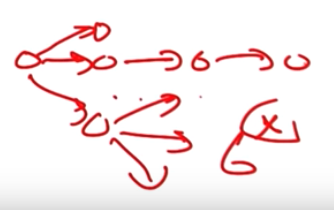

This type of problem is formally called a **combinatorial optimization** problem, or less formally, a **search** problem.


## Exploring the Space

It's called **search**, but **exploration** is actually a better name for these types of problems. We start at our "home" with both glasses empty (0oz and 0oz). We then explore by going to adjacent states, such as (0, 4). 

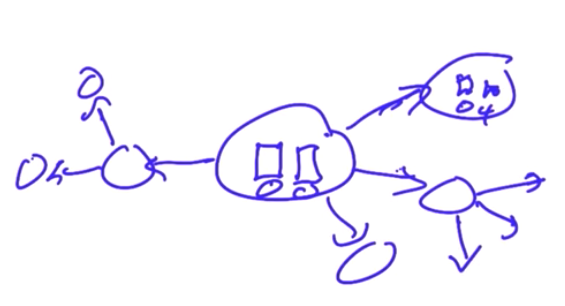

Somewhere out in this space is our goal state, which has (6, ?). But it's actually a collection of end goals, as long as the left glass has 6oz.

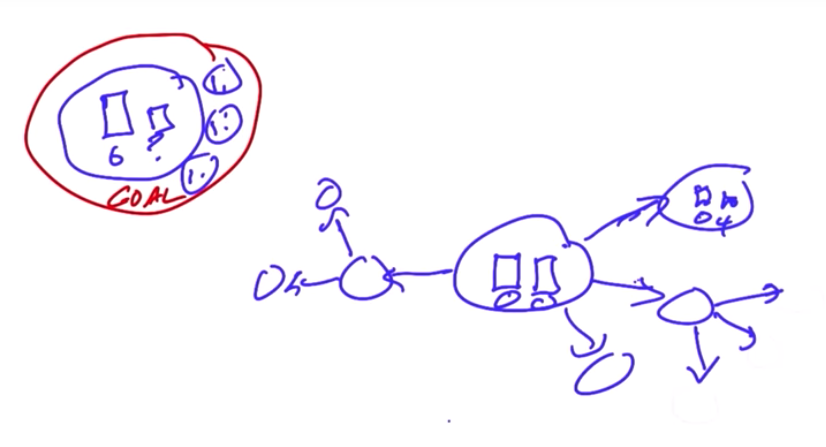

When doing exploration problems, it is useful to distinguish the **frontier** (outlined in green below) of the space you've explored. The frontier is the furthest outward you've explored so far. To make further progress towards the goal, you typically have to step from one of the frontier nodes further out.


The benefit of being a computer is that we can explore multiple paths on the frontier, and don't have to go back if we go down a bad path. It is like a group of explorers going down different pathways, collectively expanding the frontier.

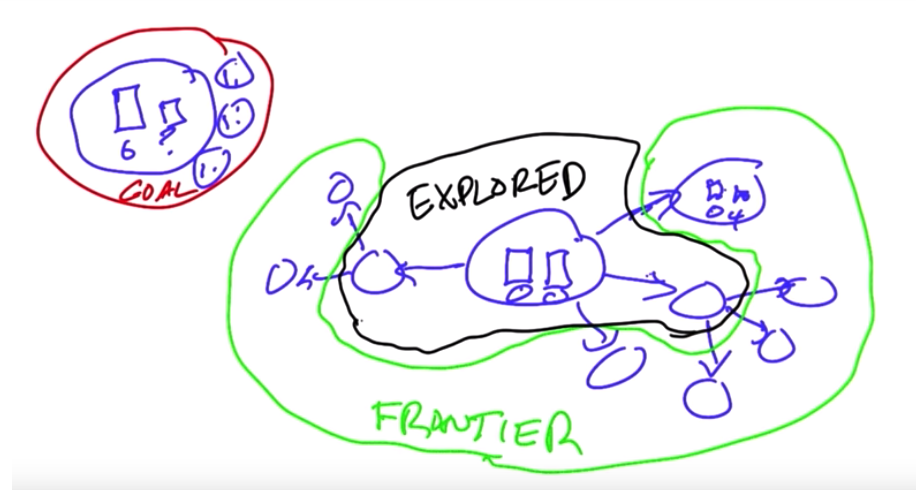

Our next move can be to take one of these explorers, and see the paths the lead to, since there's 6 possible actions. These can be states outside our current frontier, but they can be states already on the frontier, or even regress backwards to states that we've already explored.

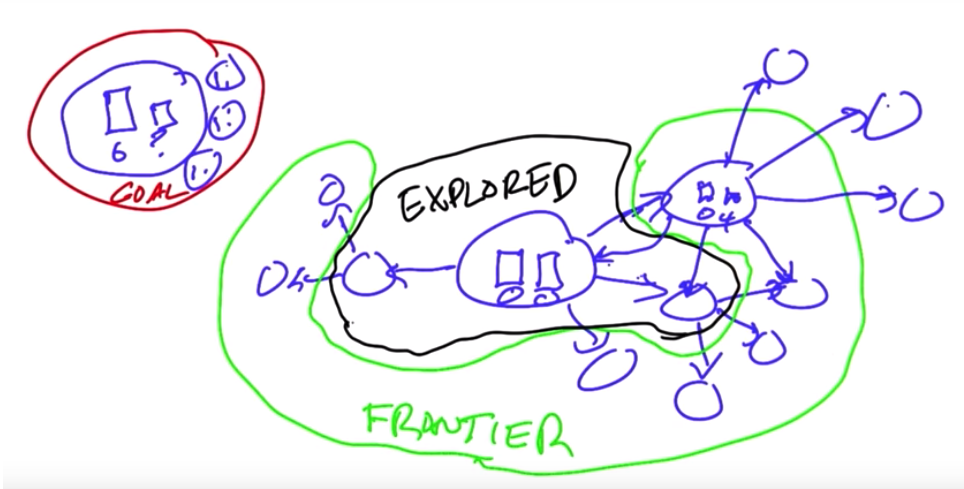

The goal is to continually expand the frontier until it overlaps our goal and we have a solution.

In exploration problems like this, there's two problems we have to worry about:

1. There's no solution at all: there's no path from the start state to the goal state. We can do the exploration and then report back that it's impossible.

2. If there is a path to the goal state, we want to make sure we can get there in a reasonable amount of time. We need to be efficient on how we explore the space. We also don't want to get stuck in an infinite loop.

If we're not clever with our approach, we may miss the solution, even though there is a path from the state to the end state.

## Strategy for Exploration

Our strategy is always concerned with "What path should we explore next?" To avoid going into an infinite loop (shown in red below), we have some possibilities:

* Don't reverse the action you just took.
* Always take the shortest path first.
* Don't reexplore. If we're on the frontier, we should not go back to already explored space.


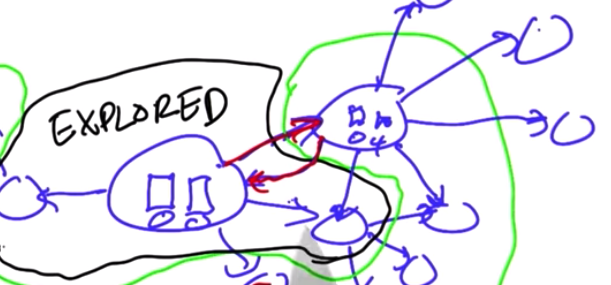

Of these possibilities, taking the shortest path first works because if there is a path, it will eventually find it. It may waste some time repeating itself and may not be the most efficient. Don't re-explore also works, and seems more efficient because it doesn't go down some of these paths. However, don't reverse isn't good enough. We could find ourself in a longer, infinite loop (shown below).

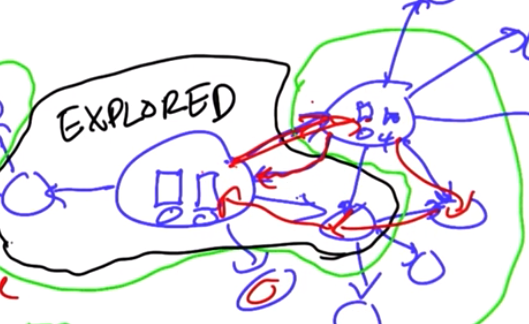

